<b>Name:</b> N.K.R.Moukthika

<b>Registration Number:</b> 21BCE7331

<b>Campus:</b> VIT-AP

<b>Date of Assignment:</b> 15th September

<b>Details of the Assignment:</b>

Perform Data preprocessing on Titanic dataset

1.Data Collection.
   Please download the dataset from https://www.kaggle.com/datasets/yasserh/titanic-dataset

2.Data Preprocessing

    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o	Perform Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test

#### 1. Import the Libraries

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Importing the dataset

In [2]:
#importing the titanic-dataset downloaded from kaggle and stored in same folder.
data=pd.read_csv("Titanic-Dataset.csv")

In [3]:
#getting the first five records from the uploaded dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#finding the number of records and features in the uploaded dataset
data.shape 

(891, 12)

In [5]:
#finding information about each and every feature
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#finding descriptive statistics of each and every feature
data.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#finding the correlation matrix
data.corr() 

C:\Users\nkrmo\AppData\Local\Temp\ipykernel_19252\4150957754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
#finding the number of people survived
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 3. Checking for Null Values

In [9]:
#finding if there are null values in any of the records from each feature
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
#finding the number of null values present in each feature
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Now, we have to handle the null values present in three features (Age, Cabin, Embarked).
#Since the data we have is less, we shall prefer replacing the null values with mean, meadian or mode.

#Consider Age. Since it contains numerical data, we shall replace it with mean.
data["Age"].fillna(data["Age"].mean(),inplace=True)

#Consider Cabin. Since it contains categorial data, we shall replace it with mode.
data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)

#Consider Embarked. Since it also contains categorial data, we shall replace it with mode.
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [12]:
#Again checking the null values present in each feature
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
#Again checking if there are null values in any of the records from each feature
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

#### 4. Data Visualization

<Axes: xlabel='Survived', ylabel='Pclass'>

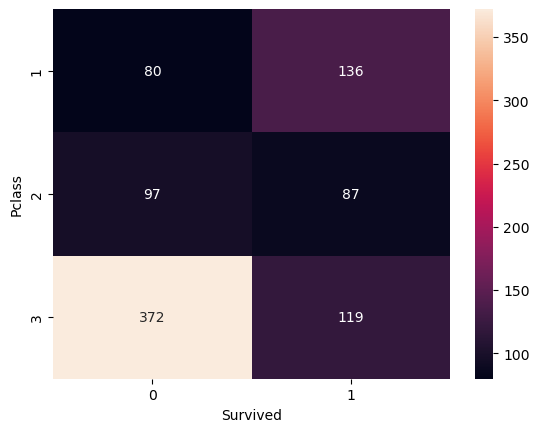

In [14]:
#PClass vs Survived (Categorial vs Categorial).
#We shall use Heat map.

# Group the dataset by Pclass and Survived and then unstack them
grp = data.groupby(['Pclass', 'Survived'])
pclass_survived = grp.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

<Axes: xlabel='Survived', ylabel='Sex'>

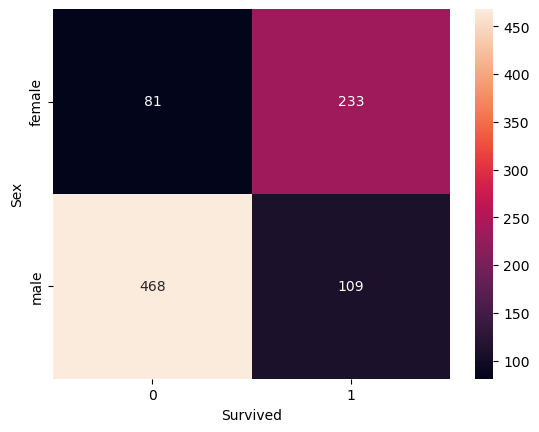

In [15]:
#Sex vs Survived (Categorial vs Categorial).
#We shall use Heat map.

# Group the dataset by Sex and Survived and then unstack them
grp1 = data.groupby(['Sex', 'Survived'])
sex_survived = grp1.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(sex_survived, annot = True, fmt ="d")


<Axes: xlabel='Sex', ylabel='Age'>

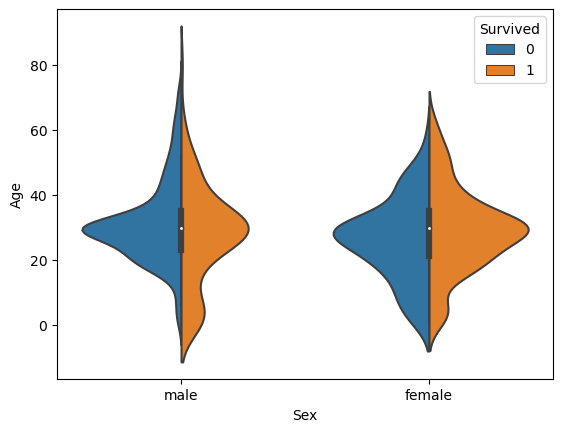

In [16]:
#Age vs Survived vs Sex (Numerical vs Categorial vs Categorial)
#We shall use violin plot.

sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = data, split = True)

<Axes: xlabel='Alone', ylabel='Survived'>

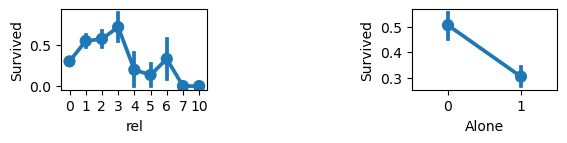

In [17]:
#Survived vs SibSp and Parch 
#First, lets add SibSp and Parch to get total no. of relatives.

# Adding a column rel
data['rel'] = 0
data['rel'] = data['SibSp']+data['Parch']

# Adding a column Alone
data['Alone'] = 0
data.loc[data.rel == 0, 'Alone'] = 1

#Now we have to plot between Alone vs Survived and rel vs Survived
#Lets use point plot

#Pointplot for rel vs survived
plt.subplot(4, 3, 1)
sns.pointplot(x ='rel', y ='Survived', data = data)

#Pointplot for alone vs survived
plt.subplot(4, 3, 3)
sns.pointplot(x ='Alone', y ='Survived', data = data)


In [18]:
#dropping the newly created features Alone and rel
data = data.drop(['Alone', 'rel'], axis=1)

<Axes: xlabel='Survived', ylabel='Fare'>

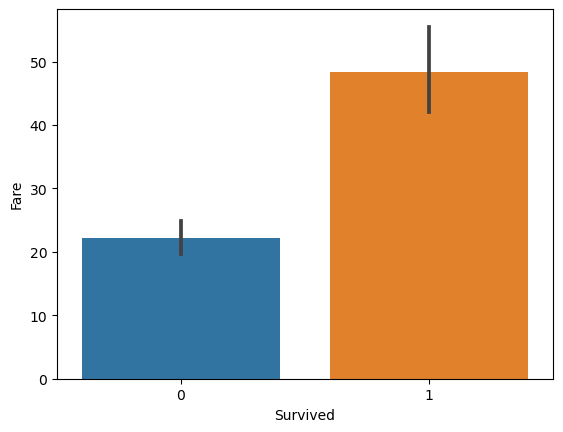

In [19]:
#Fare vs Survival (Numerical vs Categorial)
#Since fare is a continuos variable, we shall use bar plot.

sns.barplot(x ='Survived', y ='Fare',data = data)

<Axes: xlabel='Embarked', ylabel='count'>

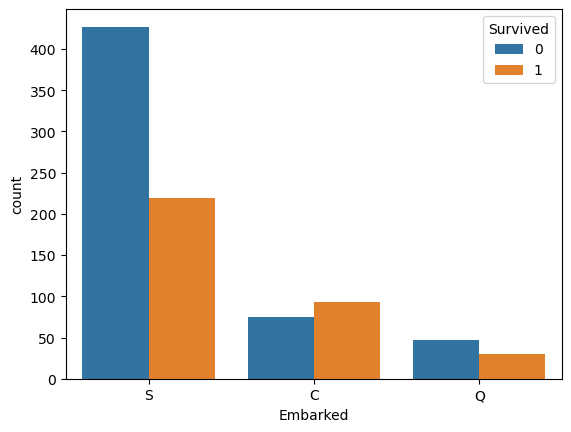

In [20]:
#Survived vs Embarked (Caregorial vs Categorial)
#We shall use countplot

sns.countplot(x ='Embarked', hue ='Survived', data=data)

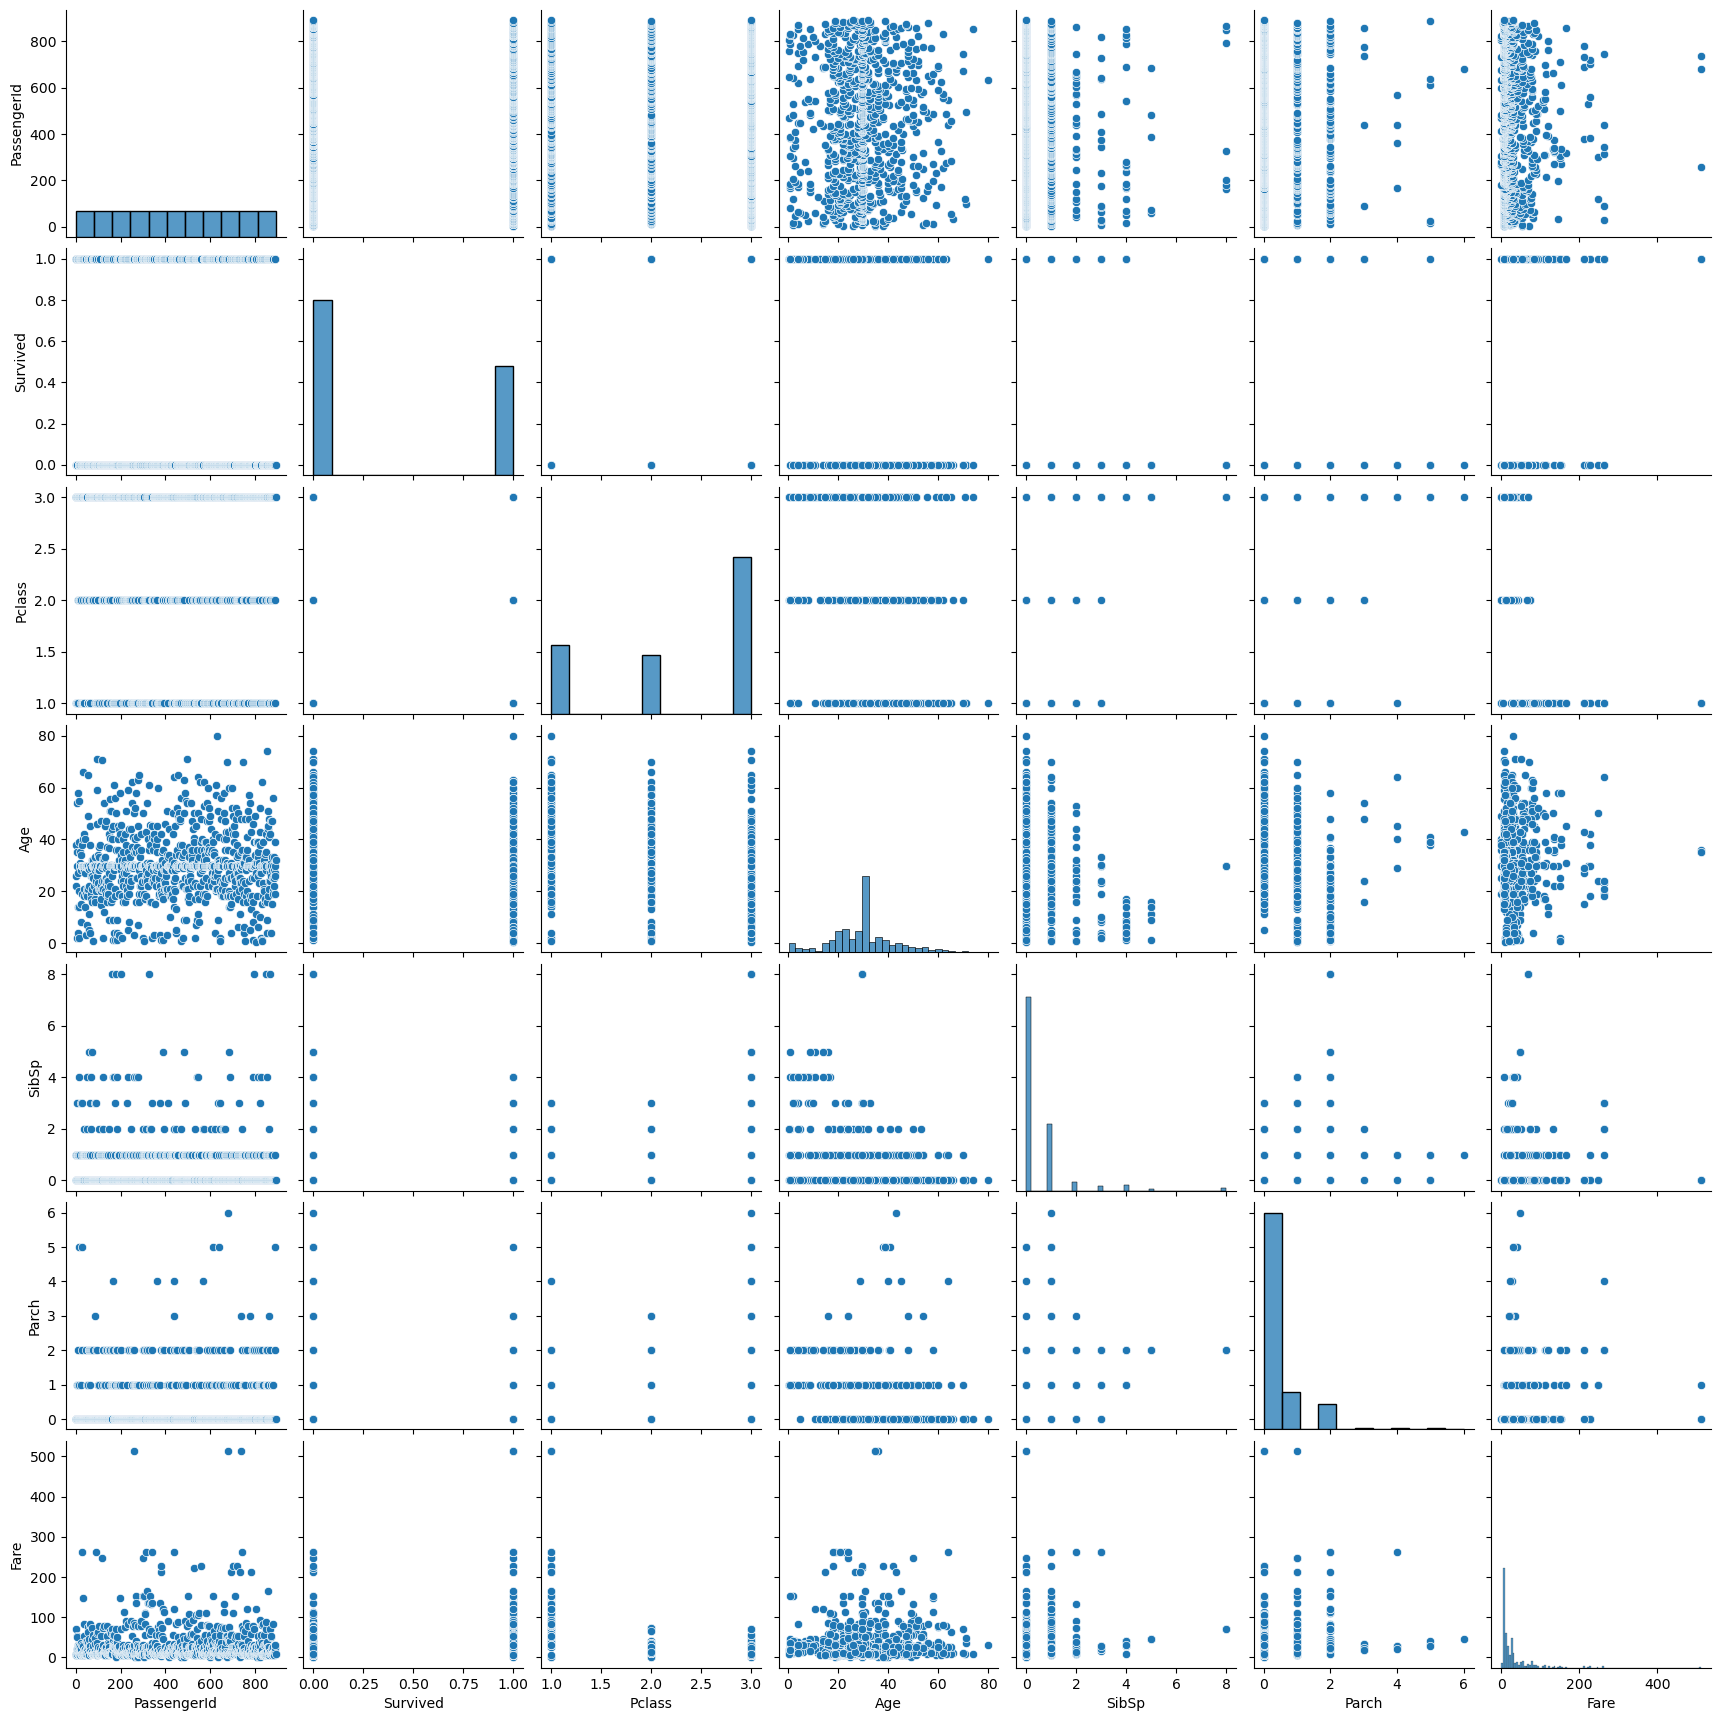

In [21]:
sns.pairplot(data)

C:\Users\nkrmo\AppData\Local\Temp\ipykernel_19252\3433357385.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

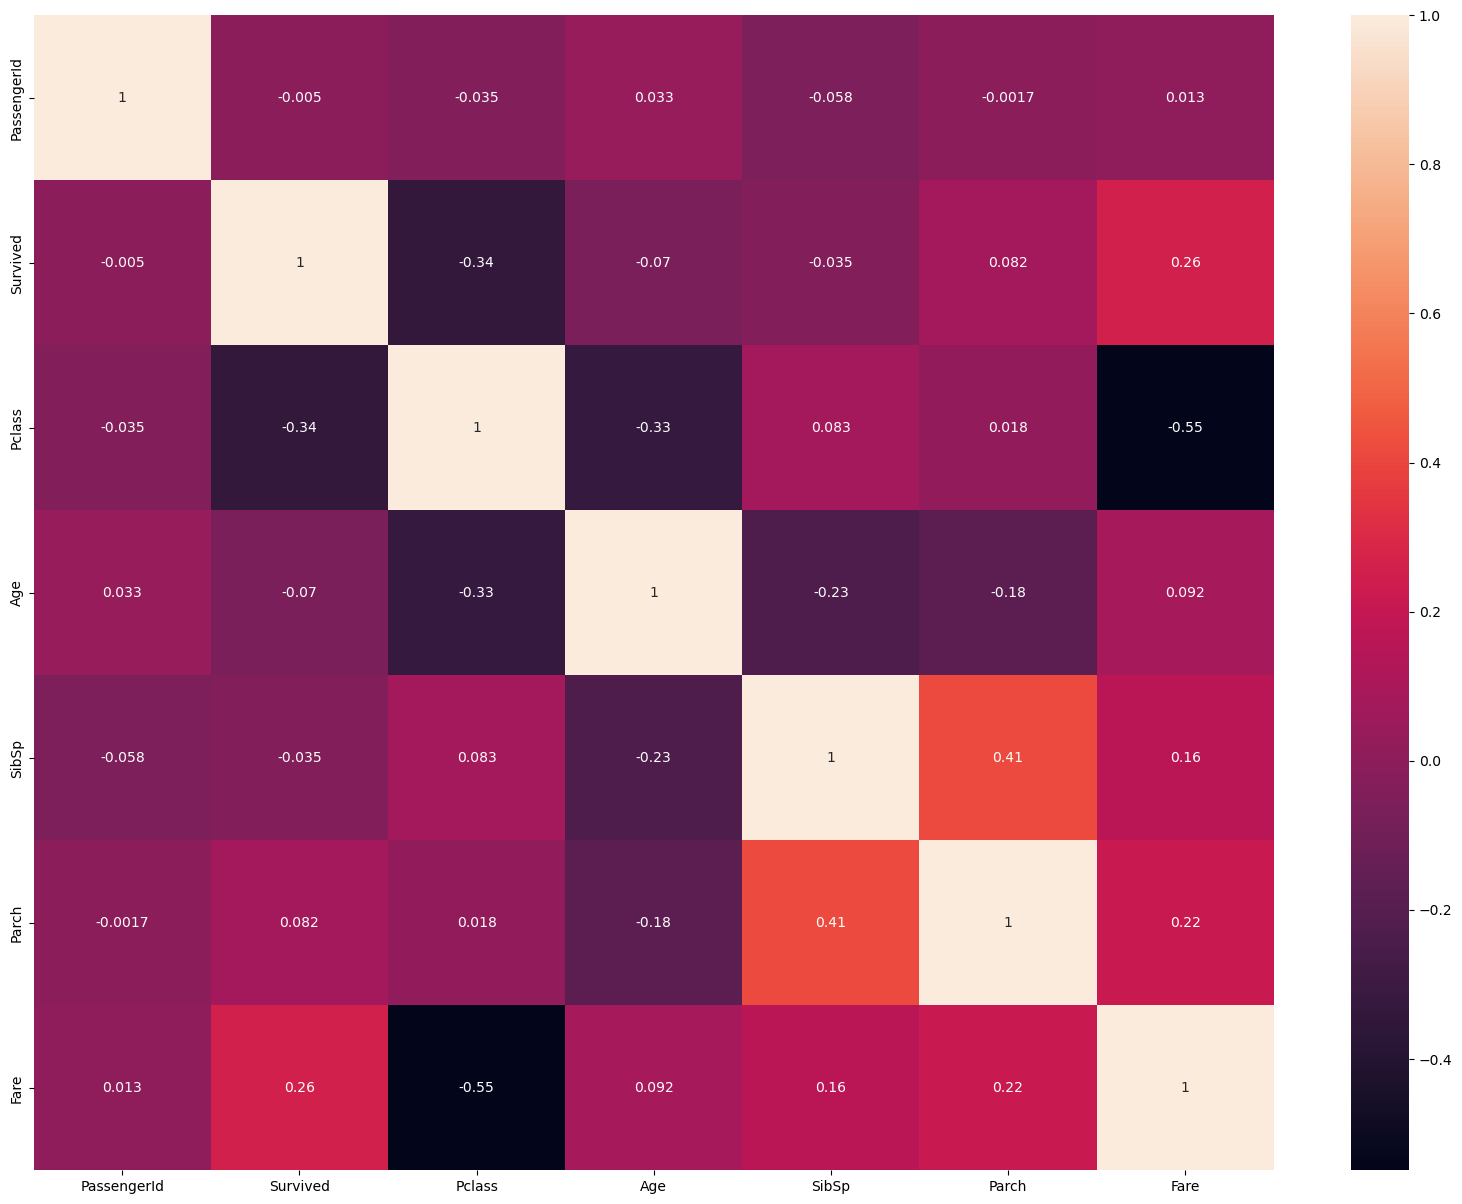

In [22]:
#Considering the correlation, lets plot the heat map.

corr=data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

#### 5. Outlier Detection

There are 2 continuos variables in our data (Age and Fare). Hence we have detect outliers for both of these features.

<Axes: >

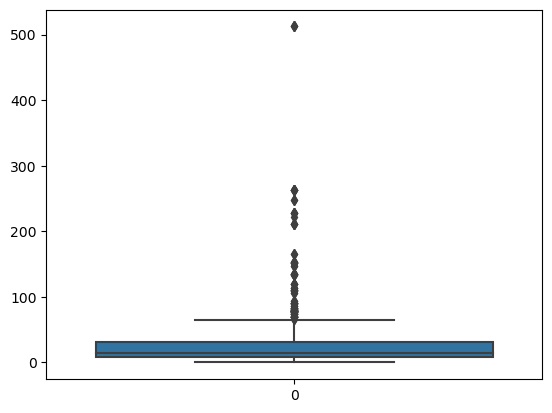

In [23]:
#First lets consider Fare feature. 
sns.boxplot(data.Fare)

In [24]:
q1 = data.Fare.quantile(0.25)
q3 = data.Fare.quantile(0.75)
IQR = q3-q1
upper_limit = q3+1.5*IQR 
lower_limit = q1-1.5*IQR

In [25]:
data['Fare']=np.where(data['Fare']>upper_limit,upper_limit,np.where(data['Fare']<lower_limit,lower_limit,data['Fare']))

<Axes: >

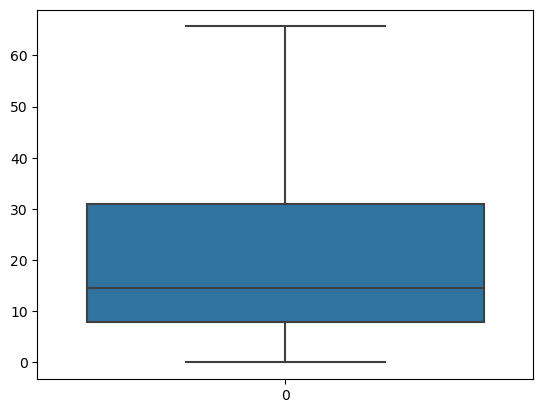

In [26]:
sns.boxplot(data.Fare)

<Axes: >

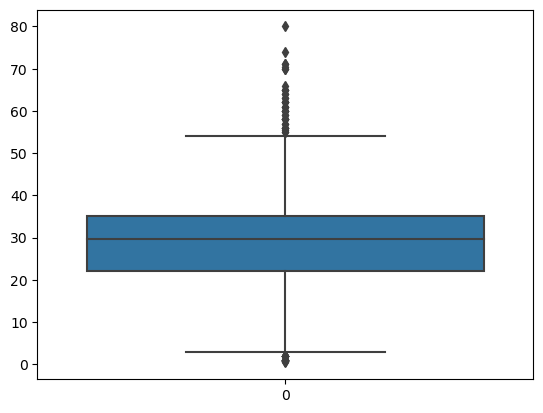

In [27]:
#Now, lets consider Age
sns.boxplot(data.Age)

In [28]:
q1 = data.Age.quantile(0.25)
q3 = data.Age.quantile(0.75)
IQR = q3-q1
upper_limit = q3+1.5*IQR 
lower_limit = q1-1.5*IQR

In [29]:
data['Age']=np.where(data['Age']>upper_limit,upper_limit,np.where(data['Age']<lower_limit,lower_limit,data['Age']))

<Axes: >

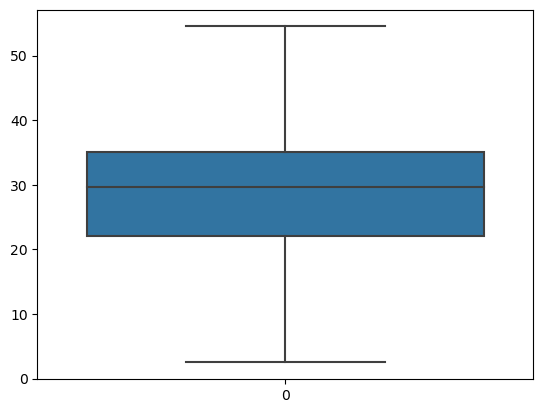

In [30]:
sns.boxplot(data.Age)

In [31]:
#lets check the shape(no. of records and features) in the dataset.
data.shape

(891, 12)

#### 6. Splitting Dependent and Independent Variables

In [32]:
#finding the dependent variables
x=data.drop(columns=["PassengerId","Survived", "Name", "Ticket", "Cabin"],axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6344,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [33]:
#finding the independent variable
y=data["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
#check if our dependent variables are of 2d array or dataframe and independent variable is of 1d array or series.
print(type(x)) 
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### 7. Perform Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
#for Sex feature

x["Sex"]=le.fit_transform(x["Sex"])
x["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [37]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,65.6344,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [38]:
#for Embarked feature

x["Embarked"]=le.fit_transform(x["Embarked"])
x["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [39]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,65.6344,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


#### 8. Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [41]:
x_scaled=ms.fit_transform(x)

In [42]:
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [43]:
x_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.375000,0.125,0.0,0.110460,1.0
1,0.0,0.0,0.682692,0.125,0.0,1.000000,0.0
2,1.0,0.0,0.451923,0.000,0.0,0.120745,1.0
3,0.0,0.0,0.625000,0.125,0.0,0.809027,1.0
4,1.0,1.0,0.625000,0.000,0.0,0.122649,1.0


#### 9. Splitting Data into Train and Test

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size =0.2,random_state =0)

In [45]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 7) (179, 7) (712,) (179,)
